# EDA - Counties Cancer Mortality Rate Prediction for Insurance Companies #

In [1]:
# lets import the necessary libraries
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
from scipy import stats

-  predict cancer mortality rate in different counties so insurance companies can adjust their premiums according to demographic characteristics
-  this model can also be applied to other contexts according to data available
-  this model can also be a tool for health budgeting in local goverments 

In [2]:
cancer_df = pd.read_csv('../data/cancer_reg.csv')
cancer_df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
cancer_df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [4]:
cancer_df.shape

(3047, 34)

In [5]:
cancer_df.isnull().sum().sort_values(ascending=False)[:5]

PctSomeCol18_24            2285
PctPrivateCoverageAlone     609
PctEmployed16_Over          152
PctEmpPrivCoverage            0
PctHS25_Over                  0
dtype: int64

In [6]:
cancer_df.duplicated().sum()

0

In [7]:
cancer_df['TARGET_deathRate'].describe()

count    3047.000000
mean      178.664063
std        27.751511
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       362.800000
Name: TARGET_deathRate, dtype: float64

count    3047.000000
mean       30.267476
std         4.636668
min        10.000000
25%        27.000000
50%        30.000000
75%        33.000000
max        61.000000
Name: annual_death_rate, dtype: float64


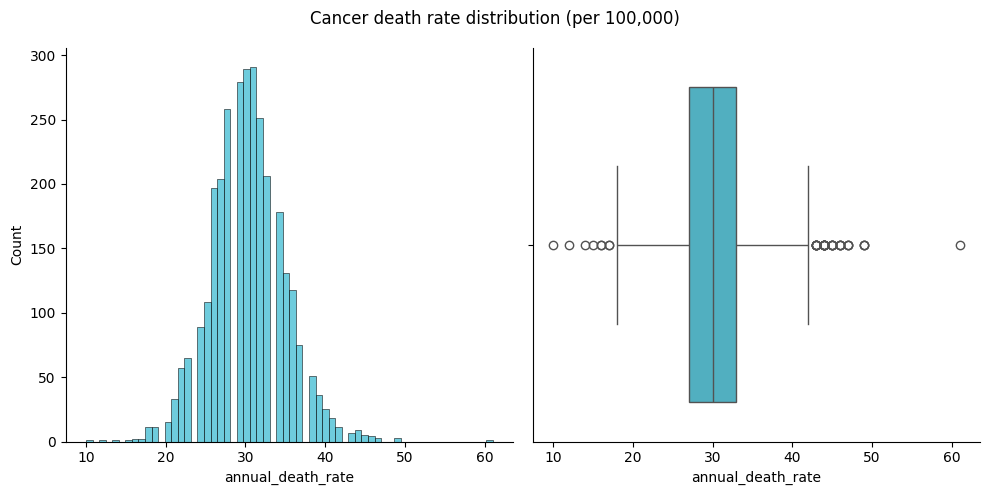

In [8]:
import math
cancer_df['annual_death_rate'] =  cancer_df['TARGET_deathRate'].map(lambda x: math.ceil(x / 6))
cancer_df.drop(columns = ['TARGET_deathRate'], inplace = True)
fig, axis = plt.subplots(nrows = 1,ncols = 2,figsize = (10, 5))
sns.despine(fig)
sns.histplot(
    data = cancer_df,
    x = 'annual_death_rate',
    ax = axis[0],
    color = '#3EBCD2'
)
sns.boxplot(
    data = cancer_df,
    x = 'annual_death_rate',
    ax = axis[1],
    color = '#3EBCD2'
)
fig.suptitle('Cancer death rate distribution (per 100,000)')
plt.tight_layout()
plt.savefig('target_distribution.jpg', dpi = 300)
print(cancer_df['annual_death_rate'].describe())

In [9]:
from scipy.stats import shapiro
_, p_value = shapiro(cancer_df['annual_death_rate'])
if p_value < 0.05:
    print('the distribution of death does not follow a normal distribution')
else: 
    print('the distribution of death follows a normal distribution')

the distribution of death does not follow a normal distribution


In [10]:
disease_col = ['annual_death_rate', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'studyPerCap']
health_coverage = ['annual_death_rate', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone']
demographic_cols = ['annual_death_rate', 'medIncome', 'popEst2015', 'povertyPercent', 'MedianAge', 'PercentMarried', 'PctMarriedHouseholds','BirthRate']
education_cols = ['annual_death_rate', 'PctNoHS18_24', 'PctHS18_24', 'PctHS25_Over','PctEmployed16_Over', 'PctUnemployed16_Over']
ethnicity = ['annual_death_rate', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace']
# correlations 
target = 'annual_death_rate'
def correlation_for_target(df, target, cols):
    return df[cols].corr()[target].sort_values(ascending = False)[1:]
disease_col_corr = correlation_for_target(cancer_df, target, disease_col)
health_coverage_corr = correlation_for_target(cancer_df, target, health_coverage)
demographic_cols_corr = correlation_for_target(cancer_df, target, demographic_cols)
education_cols_corr = correlation_for_target(cancer_df, target, education_cols)
ethnicity_corr = correlation_for_target(cancer_df, target, ethnicity)


In [11]:
import matplotlib.colors as mcolors

def customed_barplot(serie, size = (4, 6)):
    fig, axis = plt.subplots(figsize = size)
    sns.despine(fig)
    sorted_values = serie.sort_values(ascending=True)
    cmap = plt.get_cmap('coolwarm_r')
    norm = mcolors.Normalize(vmin =sorted_values.min(), vmax=sorted_values.max())
    colors = cmap(norm(sorted_values.values))
    serie.sort_values(ascending = True).plot(kind = 'barh', ax = axis, color = colors)
    axis.axvline(0, linestyle = '--', color = 'black')
    return fig, axis

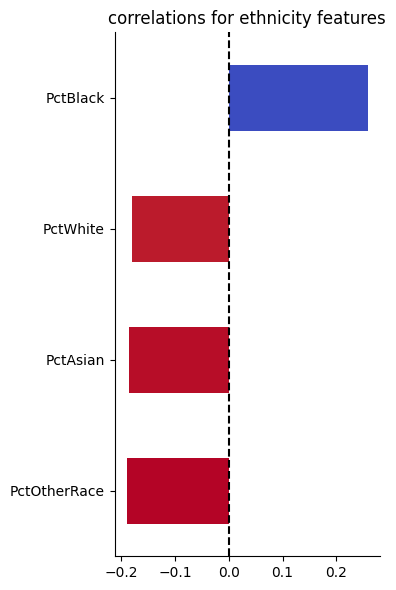

In [12]:
fig, axis = customed_barplot(ethnicity_corr)
axis.set_title('correlations for ethnicity features')
plt.tight_layout()
fig.savefig('ethnicity_corr.jpg', dpi = 300)

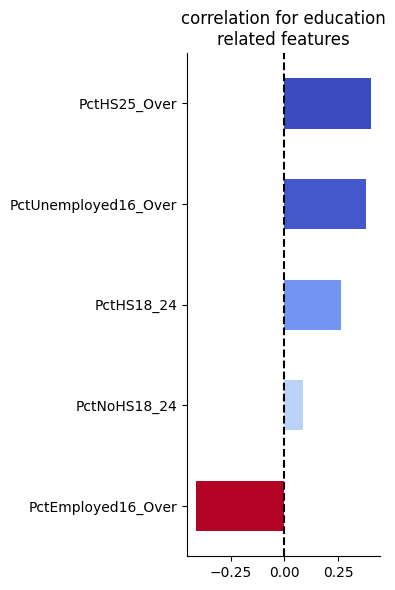

In [13]:
fig, axis = customed_barplot(education_cols_corr)
axis.set_title('correlation for education\nrelated features')
plt.tight_layout()
fig.savefig('education_corr.jpg', dpi = 300)

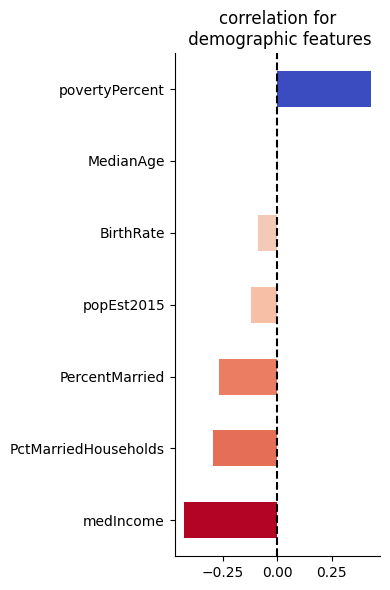

In [14]:
fig, axis = customed_barplot(demographic_cols_corr)
axis.set_title('correlation for\n demographic features')
plt.tight_layout()
fig.savefig('demographic_corr.jpg', dpi = 300)

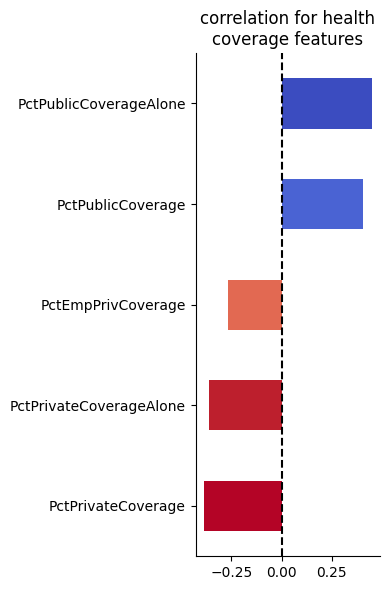

In [15]:
fig, axis = customed_barplot(health_coverage_corr)
axis.set_title('correlation for health\ncoverage features')
plt.tight_layout()
fig.savefig('health_corr.jpg', dpi = 300)

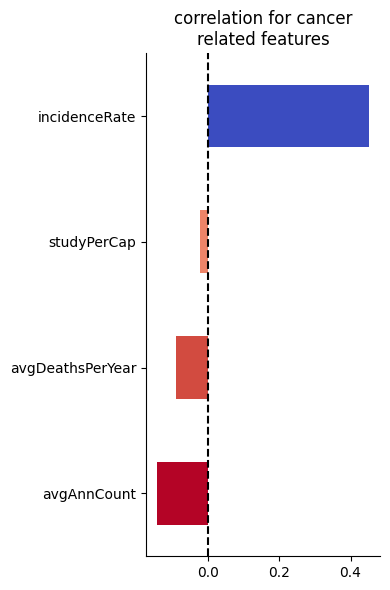

In [16]:
fig, axis = customed_barplot(disease_col_corr)
axis.set_title('correlation for cancer\nrelated features')
plt.tight_layout()
fig.savefig('cancer_corr.jpg', dpi = 300)

In [17]:
cancer_df['binnedInc'] = cancer_df['binnedInc'].str.replace('(','')
cancer_df['binnedInc'] = cancer_df['binnedInc'].str.replace(']','')
cancer_df['binnedInc'].unique()

array(['61494.5, 125635', '48021.6, 51046.4', '42724.4, 45201',
       '51046.4, 54545.6', '37413.8, 40362.7', '40362.7, 42724.4',
       '54545.6, 61494.5', '34218.1, 37413.8', '[22640, 34218.1',
       '45201, 48021.6'], dtype=object)

<Axes: >

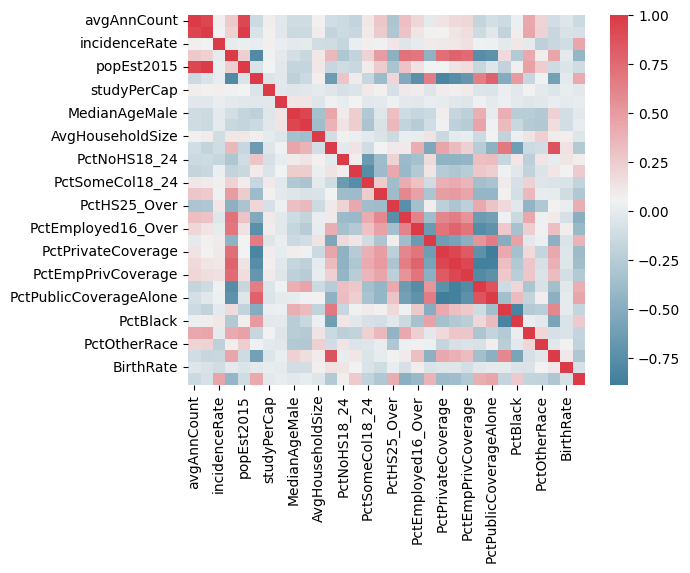

In [18]:
numeric_cols = cancer_df.select_dtypes('number').columns
sns.heatmap(cancer_df[numeric_cols].corr(),  cmap = sns.diverging_palette(230, 10, n=1001))

In [19]:
corr_df_melt = cancer_df[numeric_cols].corr().reset_index().melt(id_vars='index')
corr_df_melt.sort_values(by = 'value', ascending=False)

,index,variable,value
0,avgAnnCount,avgAnnCount,1.000000
528,PctHS25_Over,PctHS25_Over,1.000000
99,medIncome,medIncome,1.000000
132,popEst2015,popEst2015,1.000000
165,povertyPercent,povertyPercent,1.000000
...,...,...,...
696,PctPublicCoverageAlone,PctPrivateCoverageAlone,-0.856100
757,PctPrivateCoverageAlone,PctPublicCoverage,-0.862075
695,PctPublicCoverage,PctPrivateCoverageAlone,-0.862075
788,PctPrivateCoverage,PctPublicCoverageAlone,-0.886234


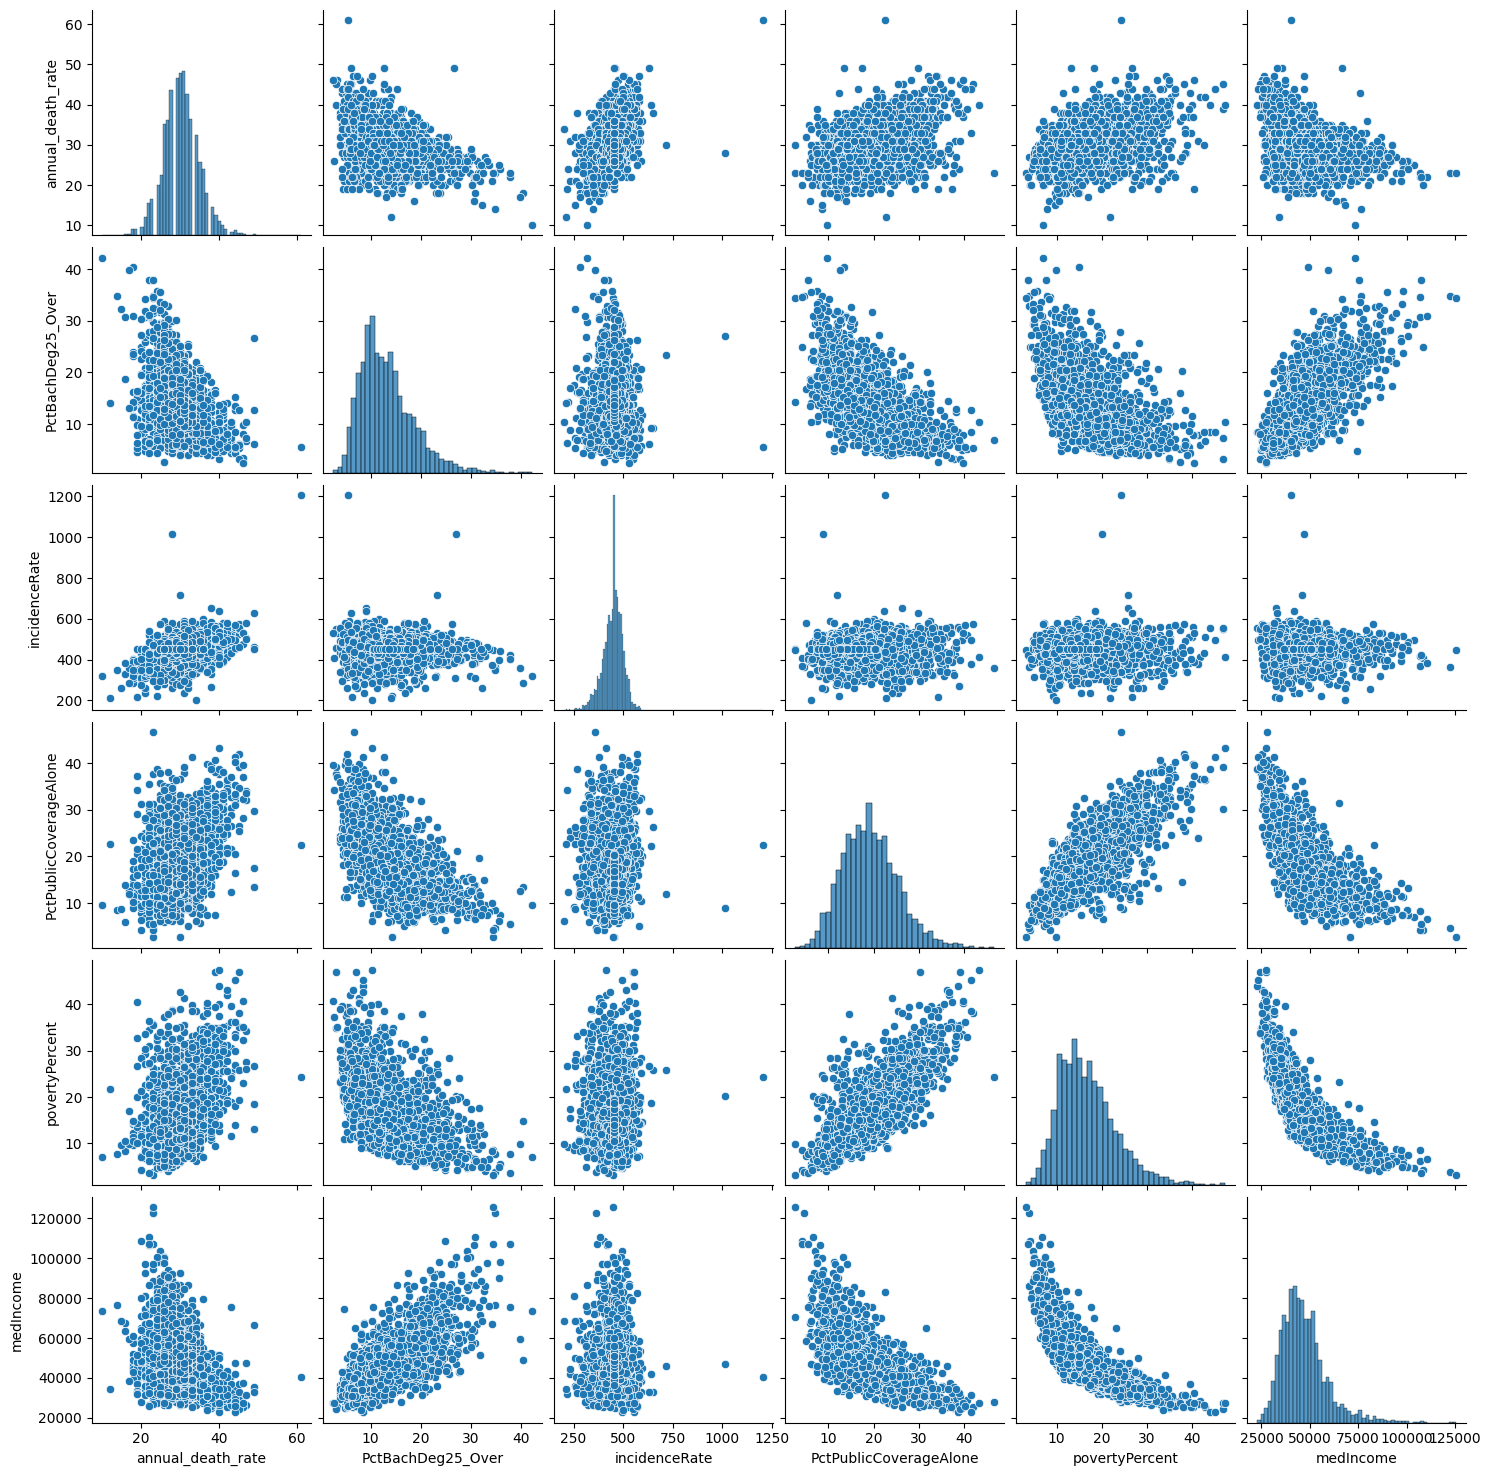

In [20]:
correlations = cancer_df[cancer_df.select_dtypes('number').columns].corr().abs()[target].sort_values(ascending = False)[0:6]
high_corr_pairplot = sns.pairplot(cancer_df[correlations.index])
high_corr_pairplot.savefig('features.jpg', dpi = 300)

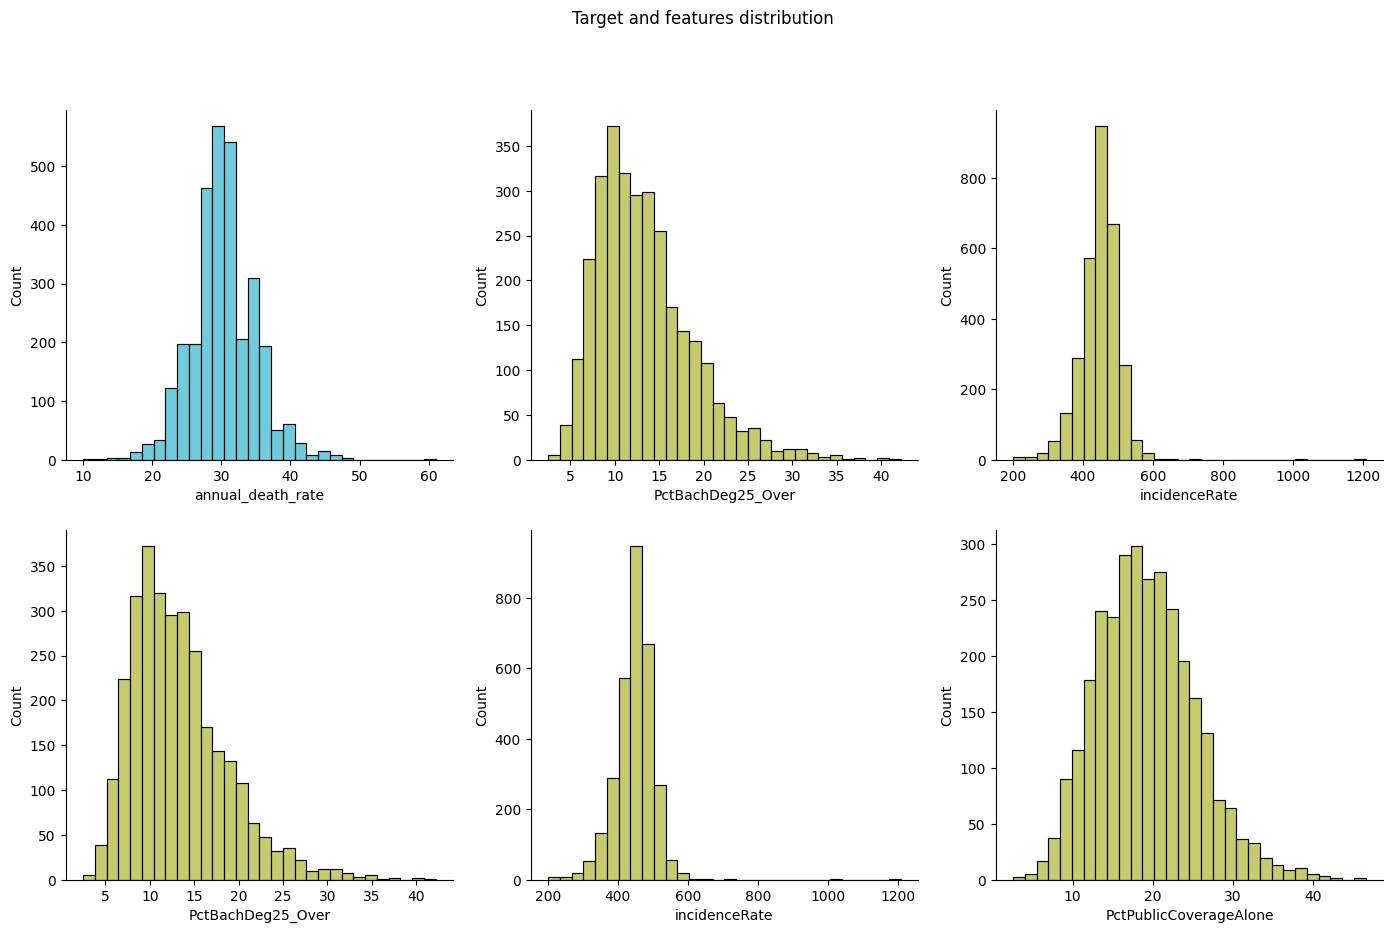

In [21]:
fig, axis = plt.subplots(2, 3, figsize = (17, 10))
sns.despine(fig)
colors = ['#3EBCD2'] + ['#B4BA39'] * 5
for i in range(2):
    for j in range(3):
        sns.histplot(ax = axis[i, j], data = cancer_df[correlations.index[i + j]], bins = 30, color = colors[i + j])
fig.suptitle('Target and features distribution')
fig.savefig('target_features_dist.jpg')

In [22]:
def corr_heatmap(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    # Calculate correlation matrix
    corr_matrix_full = df[numeric_cols].corr()

    corr_matrix = corr_matrix_full.reset_index().melt(id_vars='index')
    corr_matrix.columns = ['Variable 1', 'Variable 2', 'Correlation']

    heatmap = alt.Chart(corr_matrix).mark_rect().encode(
        alt.X('Variable 1:O', title=''),
        alt.Y('Variable 2:O', title=''),
        color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='blueorange', domain=(-1, 1))),
        tooltip=['Variable 1', 'Variable 2', 'Correlation']
    ).properties(
        width=500,
        height=500,
        title="Correlation Matrix of Numerical Variables"
    )
    return heatmap

heatmap = corr_heatmap(cancer_df)
heatmap

c:\Users\juand\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [23]:
# lets check categorical variables
cancer_df.select_dtypes('object').columns

Index(['binnedInc', 'Geography'], dtype='object')

binnedInc - Median income per capita binned by decile
Geography - County name

In [24]:
cancer_df["binnedInc"].value_counts()

binnedInc
54545.6, 61494.5    306
[22640, 34218.1     306
45201, 48021.6      306
48021.6, 51046.4    305
42724.4, 45201      305
51046.4, 54545.6    305
37413.8, 40362.7    304
40362.7, 42724.4    304
34218.1, 37413.8    304
61494.5, 125635     302
Name: count, dtype: int64

C:\Users\juand\AppData\Local\Temp\ipykernel_5428\2869561426.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='binnedInc', y='annual_death_rate', data=cancer_df, palette='coolwarm_r', ax = axis)


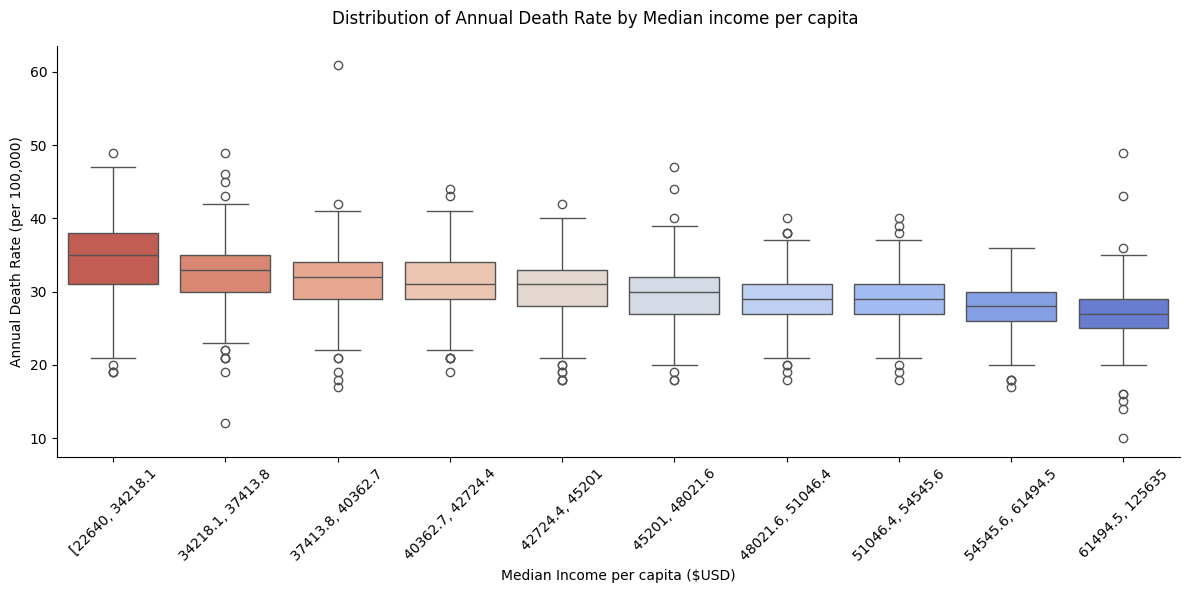

In [25]:
# Step 1: Convert 'binnedInc' to ordinal categorical
income_order = ['[22640, 34218.1', 
                '34218.1, 37413.8', 
                '37413.8, 40362.7', 
                '40362.7, 42724.4', 
                '42724.4, 45201', 
                '45201, 48021.6', 
                '48021.6, 51046.4', 
                '51046.4, 54545.6', 
                '54545.6, 61494.5', 
                '61494.5, 125635']

cancer_df['binnedInc'] = pd.Categorical(cancer_df['binnedInc'], categories=income_order, ordered=True)

custom_palette = sns.color_palette([
    "#E5EDB7", "#D7E79E", "#C3D776", "#BFD15F", 
    "#A8B24D", "#B4BA39", "#A0A740", "#86A54B", 
    "#647E3C", "#506A2C"
])

fig, axis = plt.subplots(figsize = (12, 6))
sns.despine(fig)
sns.boxplot(x='binnedInc', y='annual_death_rate', data=cancer_df, palette='coolwarm_r', ax = axis)
plt.suptitle('Distribution of Annual Death Rate by Median income per capita')
axis.set_xlabel('Median Income per capita ($USD)')
axis.set_ylabel('Annual Death Rate (per 100,000)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('income_brackets.jpg', dpi = 300)


In [26]:
anova_result = stats.f_oneway(*(cancer_df[cancer_df['binnedInc'] == binned]['annual_death_rate'] for binned in income_order))

# Output the ANOVA result
anova_result

F_onewayResult(statistic=85.63474370153787, pvalue=3.170868697444809e-142)

P-value is lower than 0.05 and almost 0, showing that the vaiances among the different salary impacts the target variable, highly unlikely that the observed differences are due to random chance.